<a href="https://colab.research.google.com/github/AldoMercado/Clasificacion-inteligente-de-datos/blob/main/Hands-on-1/Hands_on_1_Tutorial_del_Perceptr%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on 1:** Tutorial del Perceptrón
* **Nombre:** Aldo Giovanni Mercado Rodriguez
* **Materia:** Clasificación Inteligente de Datos

## **1.1 Fundamentos de la técnica**

El **Perceptrón** es uno de los algoritmos de aprendizaje supervisado más antiguos y simples, inventado por Frank Rosenblatt en 1957. Es la base de las redes neuronales artificiales.

* **Tipo de modelo:** Es un **clasificador lineal binario**. Esto significa que solo puede clasificar datos en dos categorías (ej. "Clase A" o "Clase B").

* **Funcionamiento:** Intenta encontrar un "hiperplano" que separe los datos de las dos clases.

* **Aprendizaje:** Aprende de los errores. Si clasifica mal un dato, ajusta sus "pesos" (la inclinación de la línea) para intentar corregir ese error en la siguiente iteración.

* **Limitación:** Solo puede resolver problemas que son **linealmente separables**, es decir, problemas donde una sola línea recta puede separar perfectamente ambas clases.

## **1.2 Modelo Matemático del Perceptrón**

El modelo del Perceptrón se define por dos funciones principales: la función de combinación lineal y la función de activación.

**1. Combinación Lineal (Entrada Neta)** El modelo calcula una suma ponderada de las características de entrada (features). Para un dato de entrada $\mathbf{x}$ con $n$ características ($x_1, x_2, ..., x_n$), la entrada neta $z$ se calcula como:

$$ z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b $$

Donde $\mathbf{w}$ es el vector de pesos y $b$ es el sesgo (bias). En notación vectorial, esto se simplifica a:

$$ z = \mathbf{w} \cdot \mathbf{x} + b $$

**2. Función de Activación (Función Escalón)** La salida $\hat{y}$ (la predicción) se determina aplicando una función de activación, conocida como "función escalón" (step function). Esta función decide la clase de salida:

$$ \hat{y} = \text{step}(z) = \begin{cases} 1 & \text{si } z > \theta \ 0 & \text{si } z \le \theta \end{cases} $$

Comúnmente, el sesgo $b$ se incluye en el vector de pesos (como $w_0$) y el umbral $\theta$ se establece en 0, simplificando la regla a:

$$ \hat{y} = \begin{cases} 1 & \text{si } \mathbf{w} \cdot \mathbf{x} > 0 \ 0 & \text{si } \mathbf{w} \cdot \mathbf{x} \le 0 \end{cases} $$

**3. Regla de Aprendizaje (Actualización de Pesos)** El Perceptrón aprende actualizando sus pesos $\mathbf{w}$ después de cada error. La regla de actualización es:

$$ w_j(\text{nuevo}) = w_j(\text{viejo}) + \Delta w_j $$

Donde el cambio $\Delta w_j$ se calcula como:

$$ \Delta w_j = \eta (y - \hat{y}) x_j $$

* $\eta$ (eta): Es la **tasa de aprendizaje** (un número pequeño, ej. 0.1), que controla qué tan grandes son los ajustes. * $y$: Es la etiqueta real del dato. * $\hat{y}$: Es la etiqueta predicha por el modelo. * $x_j$: Es el valor de la característica $j$ del dato.

Nota clave: Si la predicción es correcta ($y = \hat{y}$), entonces $(y - \hat{y}) = 0$, y los pesos no se actualizan.

## **1.3 Descripción de la librería, clases y funciones**

Para este tutorial, usaremos la biblioteca **scikit-learn**, que es el estándar de la industria en Python para el Machine Learning.

* **scikit-learn(osklearn)**: Es la biblioteca principal.

* **sklearn.datasets.load_iris**: Función para cargar el dataset Iris, que viene incluido en la librería.

* **sklearn.model_selection.train_test_split**: Función para dividir nuestro dataset en un conjunto de **entrenamiento** (para que el modelo aprenda) y un conjunto de **prueba** (para evaluarlo con datos que nunca ha visto).

* **sklearn.preprocessing.StandardScaler**: Una clase que nos ayuda a **escalar los datos**. Esto es importante para el Perceptrón, ya que es sensible a las diferentes escalas de las características. Estandarizar los datos (media=0, desviación=1) ayuda al modelo a converger más rápido.

* **sklearn.linear_model.Perceptron**: Esta es la clase que implementa el algoritmo del Perceptrón. La usaremos para crear y entrenar nuestro modelo.

* **sklearn.metrics.accuracy_score**: Una función para calcular la métrica de **Accuracy (Exactitud)**, que nos dirá qué porcentaje de las predicciones del modelo fueron correctas.

* **matplotlib.pyplot** as plt: Esta es la principal biblioteca de visualización (gráficas) en Python. La usamos para dos cosas en este notebook:

* * Para crear el gráfico de dispersión (scatter plot) que nos permite ver cómo están distribuidas las flores de Setosa y Versicolor.

* * Para crear la gráfica de barras de "Aciertos vs. Errores" y así visualizar el rendimiento de nuestro modelo. (Termina de copiar aquí)

## **1.4 Pipeline**

A continuación, se presenta el pipeline completo, desde la carga de datos hasta la evaluación del modelo.

In [9]:
# Paso 0: Importar las librerías necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### + Feature Engineering (Ingeniería de Características)

**Descripción de las variables (Señales I/O):**

* **Entrada (X):** Usaremos el dataset Iris. Este dataset tiene 4 características (features) de entrada, todas numéricas: 1. Largo del sépalo (cm) 2. Ancho del sépalo (cm) 3. Largo del pétalo (cm) 4. Ancho del pétalo (cm)

* **Salida (y):** La variable objetivo es la especie de la flor Iris, que tiene 3 clases (0: Setosa, 1: Versicolor, 2: Virginica).

**IMPORTANTE:** El Perceptrón estándar es un **clasificador binario** (solo 2 clases). El dataset Iris tiene 3 clases. Para este tutorial, simplificaremos el problema y **usaremos solo dos de las clases**: Setosa (0) y Versicolor (1). Se sabe que estas dos clases son linealmente separables, lo que es ideal para el Perceptrón.

El pipeline de Feature Engineering será:

1. Cargar los datos.

2. Filtrar los datos para quedarnos solo con las clases 0 y 1.

3. Dividir los datos en conjuntos de entrenamiento y prueba.

4. Estandarizar (escalar) las características.

In [10]:
# 1. Cargar datos
iris = load_iris()
X = iris.data
y = iris.target

# 2. Filtrar para clasificación binaria (Clases 0 y 1)
# Nos quedamos solo con las filas donde 'y' es 0 o 1
X_binary = X[y != 2]
y_binary = y[y != 2]

print(f"Forma original de X: {X.shape}")
print(f"Forma de X filtrada: {X_binary.shape} (100 muestras, 50 de cada clase)")

# 3. Dividir los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# 4. Escalar los datos
# Creamos el objeto escalador
scaler = StandardScaler()

# Ajustamos el escalador SOLO con los datos de entrenamiento
scaler.fit(X_train)

# Aplicamos la transformación a ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Forma original de X: (150, 4)
Forma de X filtrada: (100, 4) (100 muestras, 50 de cada clase)


### + Model Selection (Selección del Modelo)

**Razones formales para emplear un clasificador lineal (Perceptrón):**

1. **Simplicidad:** El Perceptrón es un modelo simple, rápido de entrenar y muy fácil de interpretar. Es un excelente punto de partida (baseline) antes de probar modelos más complejos.

2. **Linealidad del Problema:** Al seleccionar solo las clases Setosa y Versicolor del dataset Iris, estamos trabajando con un problema que es **conocidamente linealmente separable**. Este es el escenario ideal donde el Perceptrón está garantizado a converger y encontrar una solución perfecta (Teorema de Convergencia del Perceptrón).

3. **Eficiencia:** Debido a su simplicidad, es computacionalmente muy barato y funciona bien con datasets pequeños.

In [11]:
# 1. Creamos una instancia del modelo Perceptron
# eta0 es la tasa de aprendizaje (learning rate)
# max_iter es el número máximo de "pasadas" sobre el dataset (épocas)
# random_state=42 para asegurar que los resultados sean reproducibles
perceptron_model = Perceptron(eta0=0.1, max_iter=1000, random_state=42)

# 2. Entrenamos el modelo
# Usamos .fit() con los datos de entrenamiento escalados
perceptron_model.fit(X_train_scaled, y_train)

print("¡Modelo entrenado exitosamente!")
print(f"Pesos del modelo (w): {perceptron_model.coef_}")
print(f"Sesgo del modelo (b): {perceptron_model.intercept_}")

¡Modelo entrenado exitosamente!
Pesos del modelo (w): [[ 0.0423359  -0.08424274  0.09603259  0.10349419]]
Sesgo del modelo (b): [-0.1]


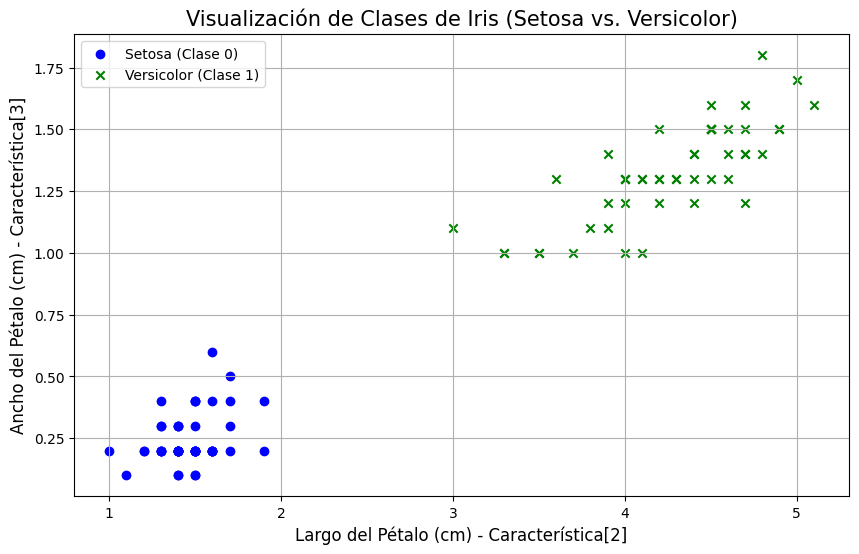

In [12]:
# --- Celda de Visualización de Datos ---
#
# Esta celda se añade para demostrar visualmente la separabilidad lineal.
# Usamos los datos 'X_binary' y 'y_binary' (antes de ser escalados)
# para poder ver los valores en sus unidades originales (cm).

# Graficaremos Característica 2 (Largo de Pétalo) vs Característica 3 (Ancho de Pétalo)
# Estas son las columnas con índices 2 y 3 en X_binary.

plt.figure(figsize=(10, 6))

# Graficar puntos de la Clase 0 (Setosa)
plt.scatter(X_binary[y_binary == 0, 2],  # x = Largo de Pétalo (col 2)
            X_binary[y_binary == 0, 3],  # y = Ancho de Pétalo (col 3)
            color='blue', marker='o', label='Setosa (Clase 0)')

# Graficar puntos de la Clase 1 (Versicolor)
plt.scatter(X_binary[y_binary == 1, 2],  # x = Largo de Pétalo (col 2)
            X_binary[y_binary == 1, 3],  # y = Ancho de Pétalo (col 3)
            color='green', marker='x', label='Versicolor (Clase 1)')

plt.title('Visualización de Clases de Iris (Setosa vs. Versicolor)', fontsize=15)
plt.xlabel('Largo del Pétalo (cm) - Característica[2]', fontsize=12)
plt.ylabel('Ancho del Pétalo (cm) - Característica[3]', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### + Prediction (Predicción)

Ahora que el modelo está entrenado, podemos usarlo para predecir la clase de nuevos datos. Primero, haremos predicciones sobre todo el conjunto de prueba y luego crearemos una función para probar un solo patrón de entrada, como se solicita.

In [13]:
# Predecir sobre todo el conjunto de prueba
y_pred = perceptron_model.predict(X_test_scaled)

print("--- Comparación de Predicciones vs Reales ---")
print(f"Predicciones: {y_pred}")
print(f"Valores Reales: {y_test}")
print("---------------------------------------------")


# Función para probar un patrón de entrada individual
def probar_patron_perceptron(patron_de_entrada):
    # El patrón de entrada debe ser una lista o array de 4 números
    if len(patron_de_entrada) != 4:
        return "Error: El patrón debe tener 4 características."

    # 1. Escalar el patrón
    # Usamos el MISMO escalador (scaler) que ajustamos con los datos de entrenamiento
    # [patron_de_entrada] lo convierte en un array 2D, que es lo que .transform espera
    patron_scaled = scaler.transform([patron_de_entrada])

    # 2. Predecir la clase
    prediccion = perceptron_model.predict(patron_scaled)

    # 3. Interpretar el resultado
    clase_predicha = prediccion[0]
    nombre_clase = "Setosa" if clase_predicha == 0 else "Versicolor"

    print(f"Patrón de entrada: {patron_de_entrada}")
    print(f"Patrón escalado: {patron_scaled}")
    print(f"Predicción (0=Setosa, 1=Versicolor): {clase_predicha}")
    print(f"Resultado: El modelo clasifica el patrón como **{nombre_clase}**.")


# Probemos la función
# Un patrón con características de Setosa (valores de pétalo bajos)
patron_setosa_ejemplo = [5.0, 3.5, 1.4, 0.2]
probar_patron_perceptron(patron_setosa_ejemplo)

print("\n" + "="*30 + "\n")

# Un patrón con características de Versicolor (valores de pétalo medios)
patron_versicolor_ejemplo = [6.0, 2.9, 4.5, 1.5]
probar_patron_perceptron(patron_versicolor_ejemplo)

--- Comparación de Predicciones vs Reales ---
Predicciones: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Valores Reales: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
---------------------------------------------
Patrón de entrada: [5.0, 3.5, 1.4, 0.2]
Patrón escalado: [[-0.73862634  0.84242744 -1.03086405 -1.03494191]]
Predicción (0=Setosa, 1=Versicolor): 0
Resultado: El modelo clasifica el patrón como **Setosa**.


Patrón de entrada: [6.0, 2.9, 4.5, 1.5]
Patrón escalado: [[ 0.83771037 -0.35696078  1.15581726  1.30783704]]
Predicción (0=Setosa, 1=Versicolor): 1
Resultado: El modelo clasifica el patrón como **Versicolor**.


### + Model Evaluation (Evaluación del Modelo)

Finalmente, evaluamos el rendimiento de nuestro modelo usando una métrica formal. Para clasificación, la métrica más simple es la **Accuracy (Exactitud)**.

**Explicación de la Métrica Accuracy:** El Accuracy mide simplemente el porcentaje de predicciones que el modelo acertó correctamente.

$$ \text{Accuracy} = \frac{\text{Número de Predicciones Correctas}}{\text{Número Total de Predicciones}} $$

Usamos los valores reales (y_test) y los valores predichos (y_pred) de nuestro conjunto de prueba.

In [14]:
# Usamos la función accuracy_score que importamos
accuracy = accuracy_score(y_test, y_pred)

print(f"Total de muestras de prueba: {len(y_test)}")
print(f"Número de aciertos: {accuracy * len(y_test)}")
print(f"Número de errores: {(1 - accuracy) * len(y_test)}")
print("\n======================================")
print(f"El Accuracy del Perceptrón en el conjunto de prueba es: {accuracy * 100:.2f}%")
print("======================================")

Total de muestras de prueba: 30
Número de aciertos: 30.0
Número de errores: 0.0

El Accuracy del Perceptrón en el conjunto de prueba es: 100.00%


Explicación: Un accuracy del 100% es esperado en este caso, ya que las clases Setosa y Versicolor del dataset Iris son linealmente separabales, y el Perceptrón está diseñado para encontrar esta separación perfectamente.

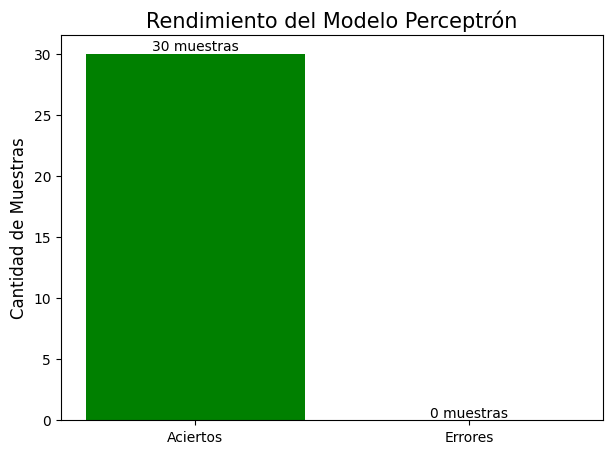

In [15]:
# --- Celda de Gráfica: Barra de Aciertos vs Errores ---

# 1. Calcular el número de aciertos y errores
# Ya tenemos el 'accuracy' y el total de muestras 'y_test'

total_muestras = len(y_test)
aciertos = int(accuracy * total_muestras)
errores = int(total_muestras - aciertos)

# 2. Preparar los datos para la gráfica
etiquetas = ['Aciertos', 'Errores']
valores = [aciertos, errores]

# 3. Crear la gráfica de barras
plt.figure(figsize=(7, 5))
barras = plt.bar(etiquetas, valores, color=['green', 'red'])

# Añadir etiquetas a las barras
plt.bar_label(barras, labels=[f'{v} muestras' for v in valores])

plt.title('Rendimiento del Modelo Perceptrón', fontsize=15)
plt.ylabel('Cantidad de Muestras', fontsize=12)
plt.yticks(range(0, total_muestras + 5, 5)) # Ajusta la escala del eje Y
plt.show()

Entrenando un modelo 2D exclusivo para la visualización...
¡Modelo 2D entrenado! Graficando el límite de decisión...


/tmp/ipython-input-2165136870.py:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_2D_scaled[y_2D == 1, 0], X_2D_scaled[y_2D == 1, 1],


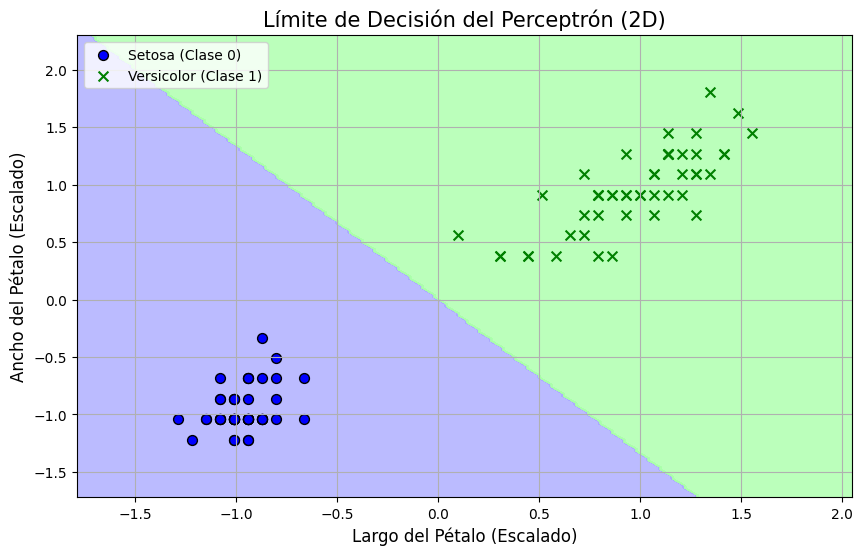

In [16]:
# --- Celda de Gráfica: Límite de Decisión ---
#
# Esta es la gráfica que muestra el hiperplano que el modelo aprendió.
#
# NOTA: Para graficar la línea en 2D, debemos entrenar un
# modelo que use *únicamente* las 2 características que
# estamos graficando (Largo y Ancho de Pétalo).

print("Entrenando un modelo 2D exclusivo para la visualización...")

# 1. Preparar datos 2D (solo Largo y Ancho de Pétalo)
# Usamos las columnas 2 y 3 del dataset original filtrado (X_binary)
X_2D = X_binary[:, [2, 3]]
y_2D = y_binary

# 2. Escalar los datos 2D
# Es buena práctica usar un nuevo escalador para este nuevo set de datos
scaler_2D = StandardScaler()
X_2D_scaled = scaler_2D.fit_transform(X_2D)

# 3. Entrenar un nuevo Perceptrón 2D
perceptron_2D = Perceptron(eta0=0.1, max_iter=1000, random_state=42)
perceptron_2D.fit(X_2D_scaled, y_2D)

print("¡Modelo 2D entrenado! Graficando el límite de decisión...")

# 4. Crear una malla (meshgrid) para graficar el fondo
# (Esto creará las áreas de color de "Setosa" y "Versicolor")

# Encontrar los límites de los datos escalados para crear la malla
x_min, x_max = X_2D_scaled[:, 0].min() - 0.5, X_2D_scaled[:, 0].max() + 0.5
y_min, y_max = X_2D_scaled[:, 1].min() - 0.5, X_2D_scaled[:, 1].max() + 0.5

# Crear la malla de puntos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))

# Predecir la clase para CADA punto en la malla
Z = perceptron_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Graficar el Límite de Decisión y los Puntos de Datos
plt.figure(figsize=(10, 6))

# Dibujar las áreas de decisión (las zonas de color)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA']) # Colores para las áreas
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Dibujar los puntos de datos (los mismos del scatter plot, pero ahora escalados)

# Puntos de Setosa (Clase 0)
plt.scatter(X_2D_scaled[y_2D == 0, 0], X_2D_scaled[y_2D == 0, 1],
            color='blue', marker='o', label='Setosa (Clase 0)', edgecolor='k', s=50)

# Puntos de Versicolor (Clase 1)
plt.scatter(X_2D_scaled[y_2D == 1, 0], X_2D_scaled[y_2D == 1, 1],
            color='green', marker='x', label='Versicolor (Clase 1)', edgecolor='k', s=50)

plt.title("Límite de Decisión del Perceptrón (2D)", fontsize=15)
plt.xlabel("Largo del Pétalo (Escalado)", fontsize=12)
plt.ylabel("Ancho del Pétalo (Escalado)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Explicación de la gráfica:
El área azul es la 'Zona Setosa' y el área verde es la 'Zona Versicolor'. La línea recta donde los colores cambian es el 'hiperplano' o 'límite de decisión' que el Perceptrón aprendió.

## **2. Ejecución del Notebook**

Todas las celdas de código de este notebook están diseñadas para ejecutarse en orden (desde la importación de librerías hasta la evaluación final) en Google Colab o Jupyter, sin generar errores.

## 3. **Referencias Bibliográficas**

* Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2ª ed.). O'Reilly Media.
* Rosenblatt, F. (1957). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. *Psychological Review*, 64(6), 386-408.
* Documentación oficial de Scikit-Learn sobre el Perceptrón: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
* Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7(2), 179-188. (Paper original del dataset Iris).